# <font color='#FFE15D'>**Week 13: Neural Networks 🧠**</font>

## **🔸 Imports**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from mlxtend.plotting import plot_decision_regions

import __main__

## **🔸 XOR (from Scratch)**

### Activation Function

In [42]:
def relu(x):
    return np.maximum(0, x)

In [43]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

### Loss 

In [44]:
def bce(y, y_hat):
    return np.mean(-(y*np.log(y_hat) + (1-y)*np.log(1-y_hat)))

In [45]:
def mse(y, y_hat):
    return np.mean((y - y_hat)**2)

### Accuracy

In [46]:
def accuracy(y, y_hat, t=0.5):
    y_hat = np.where(y_hat<t, 0, 1)
    acc = np.sum(y == y_hat) / len(y)
    return acc

### Network

In [47]:
def mlp_xor(X, w1, b1, w2, b2):
    hidden_output = np.dot(X, w1) + b1
    activation_output = relu(hidden_output)
    output_layer = sigmoid(np.dot(activation_output, w2) + b2)
    return output_layer, hidden_output, activation_output

### Data

In [48]:
# Define the XOR problem inputs and outputs
X = np.array([[0, 0], 
              [0, 1], 
              [1, 0], 
              [1, 1]])

y = np.array([[0], 
              [1], 
              [1], 
              [0]])

### Initialization

In [49]:
# Define the initial weights and biases
np.random.seed(42)
w1 = np.random.rand(2, 2)  # Weights of the first layer
b1 = np.random.rand(1, 2)  # Biases of the first layer
w2 = np.random.rand(2, 1)  # Weights of the second layer
b2 = np.random.rand(1)     # Bias of the second layer

# Define the learning rate and number of iterations
learning_rate = 0.9
num_iterations = 10000

### Train

In [50]:
for i in range(num_iterations):
    # Forward propagation
    y_hat, h, a = mlp_xor(X, w1, b1, w2, b2)

    # Calculate the loss
    loss = bce(y, y_hat)
    print(loss)
    
    # Backward propagation
    # Calculate deltas
    delta_output = y_hat - y
    delta_hidden = (delta_output @ w2.T) * (h > 0)

    # Calculate gradients
    W2_grad = a.T @ delta_output
    b2_grad = delta_output.mean(0)
    W1_grad = X.T @ delta_hidden
    b1_grad = delta_hidden.mean(0)
    
    # Update weights and biases
    w2 -= learning_rate * W2_grad
    b2 -= learning_rate * b2_grad
    w1 -= learning_rate * W1_grad
    b1 -= learning_rate * b1_grad

0.9551102265228774
0.7122658791888699
0.6953895524290212
0.6933625412304004
0.6914607098789181
0.6902212274204546
0.6861865073449301
0.6816942196514212
0.6800528889507402
0.6738764442425274
0.6678126215357629
0.6647414680891274
0.6521651741691505
0.6598071961684125
0.6951361060536743
0.6857867329238421
0.6480311220570181
0.6321010073145903
0.659974498595157
0.6610414904169819
0.6280088202323146
0.6353582334238032
0.6207122915384063
0.6517281072197331
0.5962681025547866
0.6378815585788358
0.5705642942195265
0.627904309043473
0.5372808777336423
0.6047878749181145
0.48994985884424985
0.5588543271852463
0.4312395902068934
0.49452121945629285
0.3724913060107345
0.4392835197417444
0.3045329835409151
0.3868167842398037
0.2699417305672859
0.32839358786143635
0.2071635779974082
0.26195098140522705
0.16523055029202838
0.15118975765991935
0.1415889323874553
0.13630311393079483
0.12635884750988324
0.14772947349918722
0.11293028882727484
0.10483434919587746
0.09796642848153658
0.091967738748332
0.0

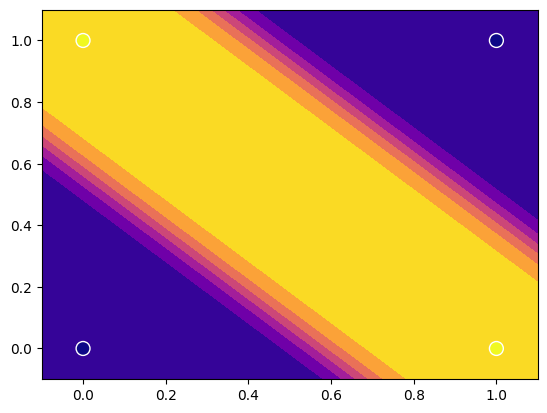

In [51]:
h = 0.001  # step size in the mesh
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
x1, x2 = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Y, H, A  = mlp_xor(np.c_[x1.ravel(), x2.ravel()], w1, b1, w2, b2)
Y = Y.reshape(x1.shape)

plt.contourf(x1, x2, Y, cmap='plasma')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='plasma', edgecolor='w')

In [52]:
A

array([[3.42082482, 0.        ],
       [3.41797375, 0.        ],
       [3.41512267, 0.        ],
       ...,
       [0.        , 3.93446603],
       [0.        , 3.93775059],
       [0.        , 3.94103515]])

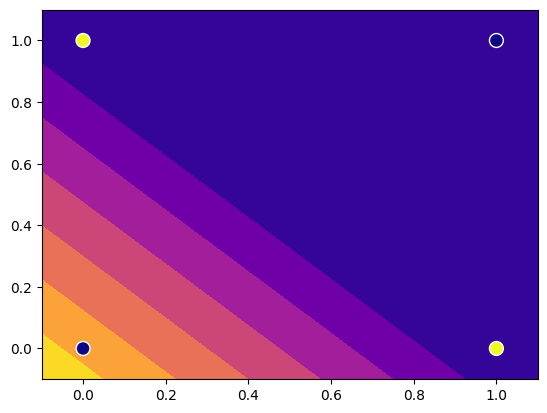

In [53]:
A0 = A[:, 0].reshape(x1.shape)

plt.contourf(x1, x2, A0, cmap='plasma')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='plasma', edgecolor='w')

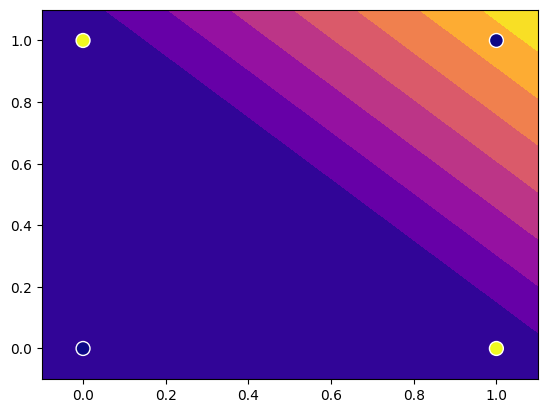

In [54]:
A1 = A[:, 1].reshape(x1.shape)

plt.contourf(x1, x2, A1, cmap='plasma')
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='plasma', edgecolor='w')